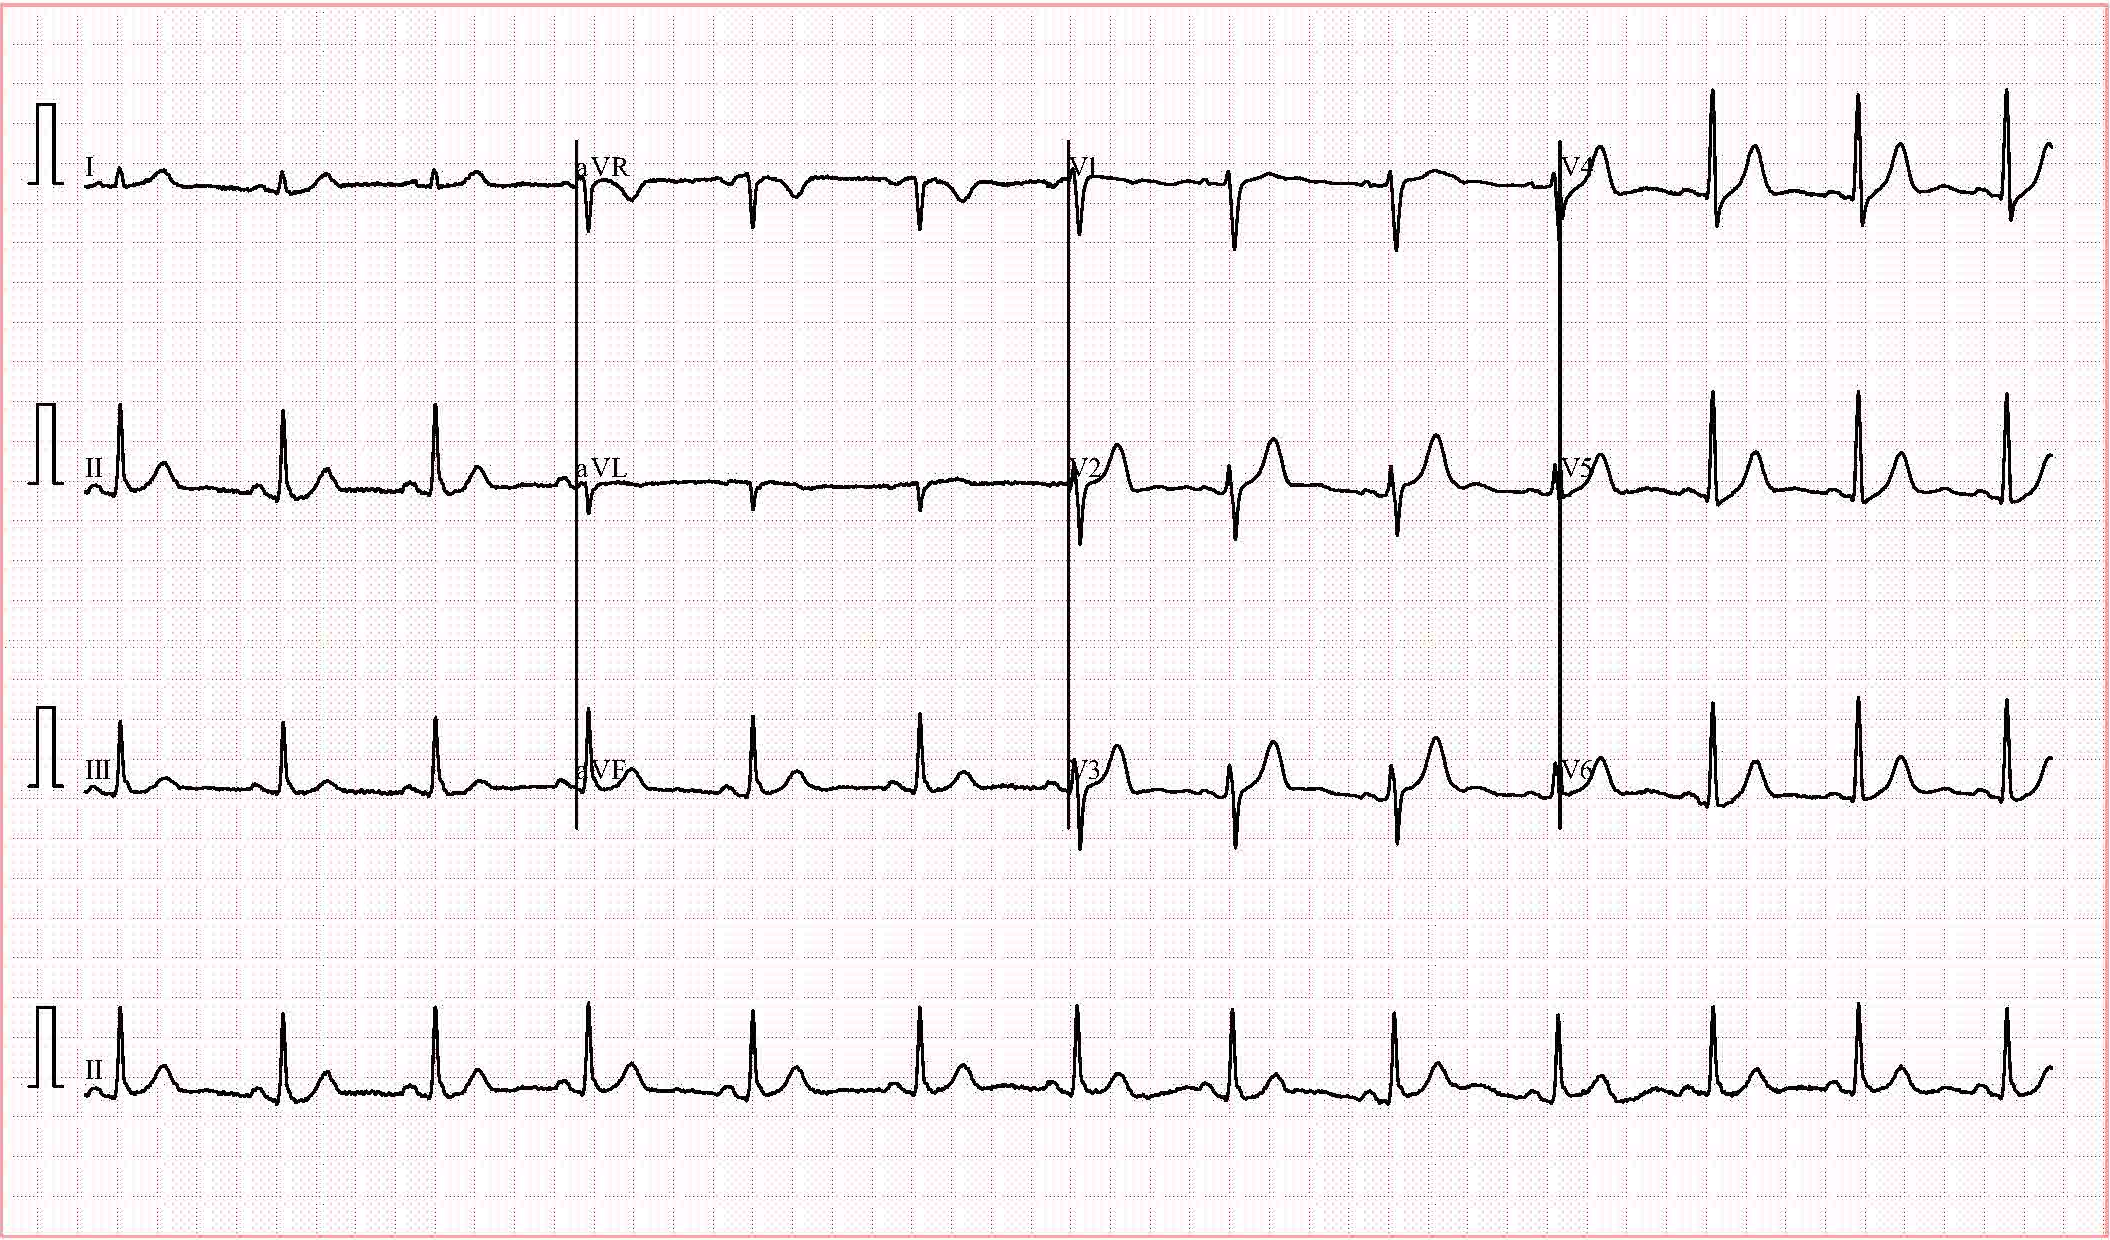

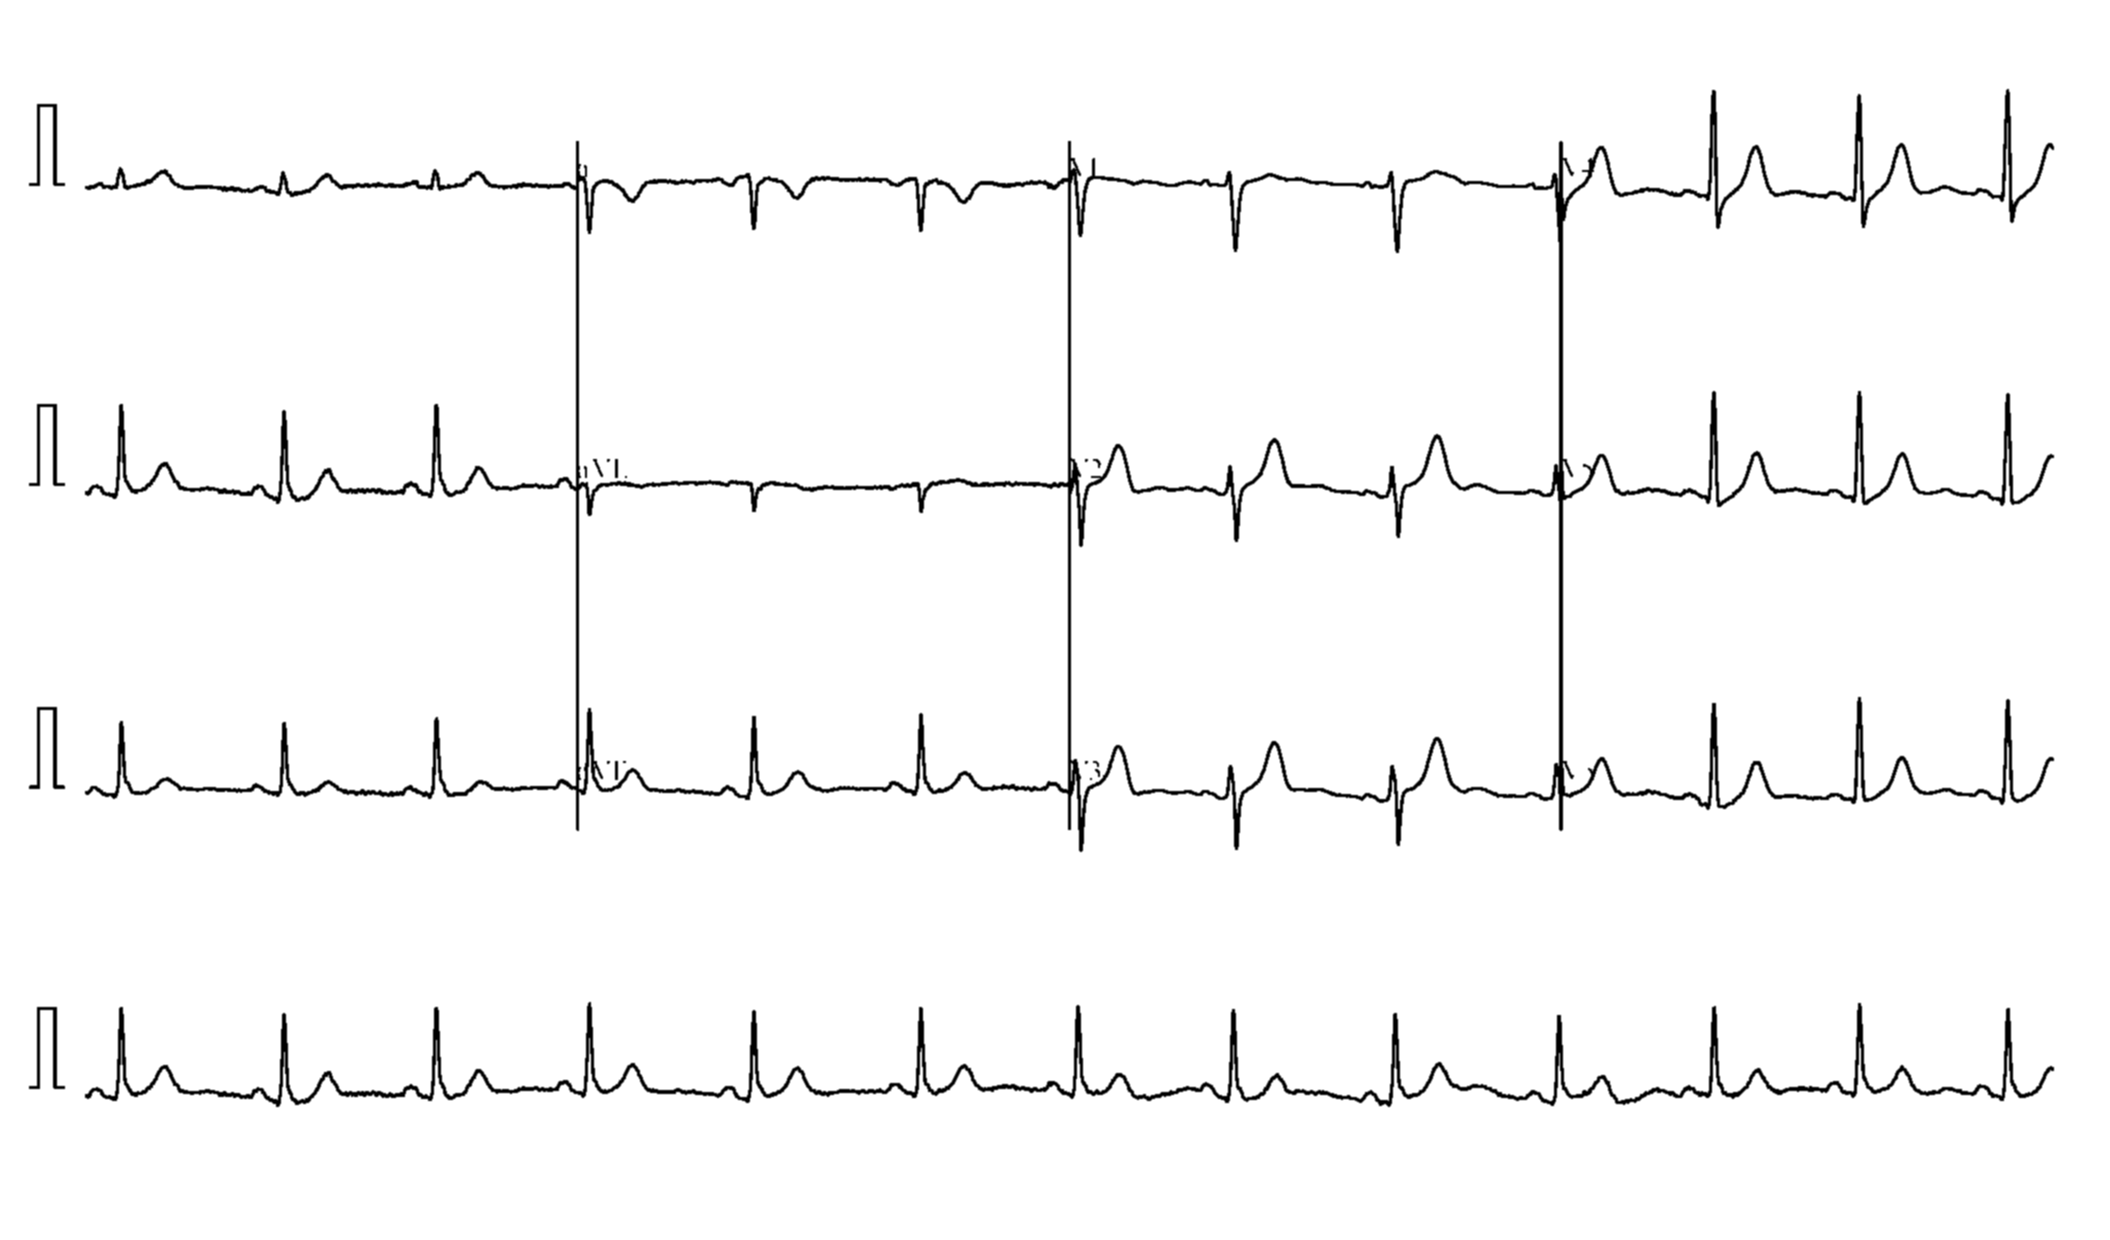

In [6]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2 
from scipy import fftpack
from PIL import Image,ImageEnhance
import scipy.fftpack
from skimage import data, io
from scipy.signal import convolve2d as conv2

from matplotlib import pyplot as plt

image = cv2.imread('/content/crroped.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)


cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 50:
        cv2.drawContours(opening, [c], -1, 0, -1)


result = 255 - opening
result = cv2.GaussianBlur(result, (3,3), 0)
cv2_imshow(image)
cv2_imshow(result)